In [0]:
import matplotlib
matplotlib.use('agg')

In [0]:
%matplotlib inline

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import AveragePooling2D
from keras.applications import ResNet50
# from keras.layers.core import Dropout, Flatten
from keras.layers import Activation, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import pickle
import cv2
import os

Using TensorFlow backend.


In [0]:
LABELS = set(['basketball', 'biking', 'diving', 'golf', 'horse_riding', 'soccer_juggling', 'swing', 'tennis_swing', 'trampoline_jumping', 'volleyball_spiking', 'walking'])

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
imagePaths = list(paths.list_images('drive/My Drive/action_dataset'))

In [0]:
data = []
labels = []
imagePath = 'drive/My Drive/action_dataset/biking/1192.jpg'
label = imagePath.split(os.path.sep)[-2]
for imagePath in imagePaths:
    
    label =imagePath.split(os.path.sep)[-2]
#     print(label)
    print(imagePath + ' ' + label)
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    
    data.append(image)
    labels.append(label)

drive/My Drive/action_dataset/biking/1192.jpg biking
drive/My Drive/action_dataset/biking/1197.jpg biking
drive/My Drive/action_dataset/biking/1193.jpg biking
drive/My Drive/action_dataset/biking/1194.jpg biking
drive/My Drive/action_dataset/biking/1195.jpg biking
drive/My Drive/action_dataset/biking/1198.jpg biking
drive/My Drive/action_dataset/biking/1199.jpg biking
drive/My Drive/action_dataset/biking/1206.jpg biking
drive/My Drive/action_dataset/biking/1200.jpg biking
drive/My Drive/action_dataset/biking/1201.jpg biking
drive/My Drive/action_dataset/biking/1203.jpg biking
drive/My Drive/action_dataset/biking/120.jpg biking
drive/My Drive/action_dataset/biking/1202.jpg biking
drive/My Drive/action_dataset/biking/12.jpg biking
drive/My Drive/action_dataset/biking/1204.jpg biking
drive/My Drive/action_dataset/biking/1205.jpg biking
drive/My Drive/action_dataset/biking/1207.jpg biking
drive/My Drive/action_dataset/biking/1208.jpg biking
drive/My Drive/action_dataset/biking/1216.jpg bik

In [0]:
data = np.array(data)
labels = np.array(labels)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)

(train_x, test_x, train_y, test_y) = train_test_split(data, labels, test_size = 0.25, stratify = labels, random_state = 42)

In [0]:
trainAug = ImageDataGenerator(rotation_range = 30, zoom_range = 0.15, width_shift_range = 0.2, height_shift_range=0.2, shear_range = 0.15, horizontal_flip = True, fill_mode = 'nearest')

valAug = ImageDataGenerator()
mean = np.array([123.68, 116.779, 103.939], dtype="float32")
trainAug.mean = mean
valAug.mean = mean

In [0]:
base = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape=(224, 224, 3)))

head = base.output
head = MaxPooling2D(pool_size = (2, 2))(head)
head = Flatten()(head)
head = Dense(512, kernel_initializer = 'he_normal')(head)
head = BatchNormalization()(head)
head = Activation('relu')(head)
head = Dropout(0.5)(head)
head = Dense(11, kernel_initializer = 'he_normal')(head)
head = BatchNormalization()(head)
head = Activation('softmax')(head)

model = Model(inputs = base.input, outputs = head)
for layer in base.layers:
    layer.trainable = False
adam = Adam(lr = 0.0001)

W0801 15:45:40.576867 139803366696832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 15:45:40.626254 139803366696832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0801 15:45:40.639908 139803366696832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0801 15:45:40.691202 139803366696832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0801 15:45:40.693974

94658560/94653016 [==============================] - 8s 0us/step


W0801 15:46:02.801635 139803366696832 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss='categorical_crossentropy', optimizer = adam, metrics = ['acc'])

history = model.fit_generator(trainAug.flow(train_x, train_y, batch_size=8), steps_per_epoch = len(train_x)//8, validation_data = valAug.flow(test_x, test_y), validation_steps = len(test_x)//8, epochs = 100)

W0801 15:46:02.961955 139803366696832 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0801 15:46:07.057872 139803366696832 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
1065/1065 [==============================] - 234s 220ms/step - loss: 1.4920 - acc: 0.5498 - val_loss: 0.9385 - val_acc: 0.7708
Epoch 2/100
1065/1065 [==============================] - 221s 208ms/step - loss: 1.2122 - acc: 0.6789 - val_loss: 0.8547 - val_acc: 0.8105
Epoch 3/100
1065/1065 [==============================] - 221s 208ms/step - loss: 1.1231 - acc: 0.7078 - val_loss: 0.7357 - val_acc: 0.8559
Epoch 4/100
1065/1065 [==============================] - 219s 206ms/step - loss: 1.0722 - acc: 0.7231 - val_loss: 0.6758 - val_acc: 0.8693
Epoch 5/100
1065/1065 [==============================] - 219s 205ms/step - loss: 1.0254 - acc: 0.7350 - val_loss: 0.6498 - val_acc: 0.8601
Epoch 6/100
1065/1065 [==============================] - 219s 206ms/step - loss: 0.9905 - acc: 0.7416 - val_loss: 0.6361 - val_acc: 0.8817
Epoch 7/100
1065/1065 [==============================] - 222s 208ms/step - loss: 0.9433 - acc: 0.7603 - val_loss: 0.6209 - val_acc: 0.8700
Epoch 8/100
1065/1065 [====

In [0]:
model.save('drive/My Drive/action_dataset/activity.model')
f = open('drive/My Drive/action_dataset/lb.pickle', "wb")
f.write(pickle.dumps(lb))
f.close()

                    precision    recall  f1-score   support

        basketball       0.99      0.92      0.95       183
            biking       0.88      0.97      0.92       304
            diving       1.00      0.91      0.95       247
              golf       0.94      0.99      0.96       218
      horse_riding       0.91      0.98      0.94       364
   soccer_juggling       0.96      0.97      0.97       414
             swing       0.91      0.98      0.94       258
      tennis_swing       0.93      1.00      0.96       247
trampoline_jumping       0.93      0.97      0.95       220
volleyball_spiking       0.98      0.97      0.97       128
           walking       1.00      0.66      0.80       259

          accuracy                           0.94      2842
         macro avg       0.95      0.94      0.94      2842
      weighted avg       0.94      0.94      0.94      2842



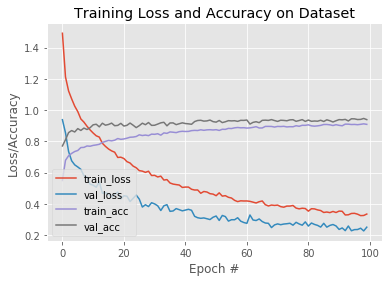

In [0]:
predictions = model.predict(test_x, batch_size=8)
print(classification_report(test_y.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))
N = 100
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
# plt.savefig("drive/My Drive/action_dataset/plot")